In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks

/content/drive/MyDrive/Colab Notebooks


# **Assignment8.1 part2**

In [ ]:
!pip install git+https://github.com/rcmalli/keras-vggface.git
# Check the successful of the installation
!pip install keras_vggface
!pip show keras-vggface
!pip install keras_applications
!pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/rcmalli/keras-vggface.git to /tmp/pip-req-build-cq5c43cp
  Running command git clone --filter=blob:none --quiet https://github.com/rcmalli/keras-vggface.git /tmp/pip-req-build-cq5c43cp
  Resolved https://github.com/rcmalli/keras-vggface.git to commit 719ad75625fe51436b9a9479114b3d136847e11a
  Preparing metadata (setup.py) ... done
  Created wheel for keras-vggface: filename=keras_vggface-0.6-py3-none-any.whl size=8325 sha256=a3e4f6cb13af1c4b1166fadf042ba8b035bd1c22889eaa7bd2eb95ea3fd64df9
  Stored in directory: /tmp/pip-ephem-wheel-cache-wipqjjn9/wheels/24/de/3d/9a0fad8c64abbc63b7fb8ddcdf1aa0a4c04a98d7936e989a29
Successfully built keras-vggface
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Name: keras-vggface
Version: 0.6
Summary: VGGFace implementation with Keras framework
Home-page: https://github.com/rcma

In [ ]:
from keras_vggface.vggface import VGGFace

In [ ]:
from keras_vggface.vggface import VGGFace
# Based models
#vggface = VGGFace(model='vgg16')
vggface = VGGFace(model='resnet50')
#vggface = VGGFace(model='senet50')

165439116/165439116 [==============================] - 25s 0us/step


In [ ]:
from keras.layers import Dense,GlobalAveragePooling2D,Flatten
from keras.preprocessing import image
from keras.applications.mobilenet import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model

num_classes = 20

vgg_model = VGGFace(include_top=False, input_shape=(224, 224, 3)) #导入的图片尺寸size
last_layer = vgg_model.get_layer('pool5').output
x = Flatten(name='flatten')(last_layer)
out = Dense(num_classes, activation='softmax', name='classifier')(x)
custom_vgg_model = Model(vgg_model.input, out)
custom_vgg_model.summary()

58909280/58909280 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1_1 (Conv2D)            (None, 224, 224, 64)      1792      
                                                                 
 conv1_2 (Conv2D)            (None, 224, 224, 64)      36928     
                                                                 
 pool1 (MaxPooling2D)        (None, 112, 112, 64)      0         
                                                                 
 conv2_1 (Conv2D)            (None, 112, 112, 128)     73856     
                                                                 
 conv2_2 (Conv2D)            (None, 112, 112, 128)     147584    
                                                              

In [ ]:
img_rows, img_cols = 224, 224
input_shape = (img_rows, img_cols, 3)

train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory('/content/drive/MyDrive/dataset/gt_db_train/',target_size=(img_rows,img_cols),batch_size=20,class_mode='categorical', shuffle=True)
step_size_train = int(round(train_generator.n/train_generator.batch_size))

val_datagen = ImageDataGenerator(rescale=1./255)
val_generator = val_datagen.flow_from_directory('/content/drive/MyDrive/dataset/gt_db_val/',target_size=(img_rows,img_cols),batch_size=20,class_mode='categorical', shuffle=True)
step_size_val = int(round(val_generator.n/val_generator.batch_size))

Found 200 images belonging to 20 classes.
Found 100 images belonging to 20 classes.


In [ ]:
import keras
from keras.optimizers import SGD, Adam

adam = Adam(lr=0.0003)
custom_vgg_model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=adam,
              metrics=['accuracy'])
history = custom_vgg_model.fit_generator(generator=train_generator,
                   steps_per_epoch=step_size_train,epochs=20, 
                   validation_data=val_generator,
                   validation_steps=step_size_val)



<ipython-input-18-26d93f13c3cb>:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = custom_vgg_model.fit_generator(generator=train_generator,


Epoch 1/20
10/10 [==============================] - 77s 8s/step - loss: 2.8053 - accuracy: 0.1950 - val_loss: 2.0470 - val_accuracy: 0.5500
Epoch 2/20
10/10 [==============================] - 4s 418ms/step - loss: 1.0375 - accuracy: 0.7450 - val_loss: 0.3078 - val_accuracy: 0.8900
Epoch 3/20
10/10 [==============================] - 4s 407ms/step - loss: 0.3759 - accuracy: 0.9100 - val_loss: 0.6957 - val_accuracy: 0.8400
Epoch 4/20
10/10 [==============================] - 4s 408ms/step - loss: 0.2252 - accuracy: 0.9600 - val_loss: 0.0079 - val_accuracy: 1.0000
Epoch 5/20
10/10 [==============================] - 4s 412ms/step - loss: 0.0567 - accuracy: 0.9800 - val_loss: 0.0797 - val_accuracy: 0.9500
Epoch 6/20
10/10 [==============================] - 4s 411ms/step - loss: 0.0358 - accuracy: 0.9900 - val_loss: 0.0403 - val_accuracy: 0.9900
Epoch 7/20
10/10 [==============================] - 4s 410ms/step - loss: 0.0123 - accuracy: 0.9950 - val_loss: 0.0016 - val_accuracy: 1.0000
Epoch 8/

# **Assignment8.2**

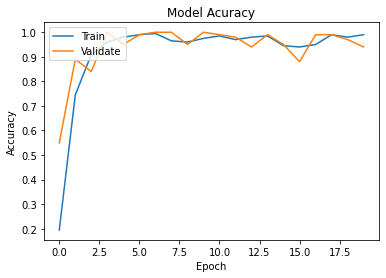

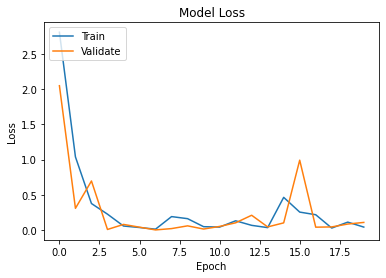

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
# Plot training accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Acuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validate'], loc='upper left')
plt.savefig('/content/drive/MyDrive/dataset/Accuracy.png')
plt.show()

# Plot training loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validate'], loc='upper left')
plt.savefig('/content/drive/MyDrive/dataset/Loss.png')
plt.show()
